In [6]:
import pandas as pd
import sqlite3

In [7]:
conn = sqlite3.connect('../res/tables.sql')
cursor = conn.cursor()

In [8]:
cursor.execute('''
SELECT * FROM profile
JOIN activities
ON profile.id = activities.id
''')
row = cursor.fetchall()
conn.close()

In [9]:
# convert the data from bytes to integer
dataset = map(lambda xs: [x for x in map(lambda y: int.from_bytes(y, 'little'), xs)], row)

# fetch the column names
column_names = [item[0] for item in cursor.description]

df = pd.DataFrame(data=dataset, columns=column_names)
df.head()

,id,gender,age,household size,family relationship,health,id,study time,social activities,drinker,absences
0,1,1,18,1,4,3,1,2,4,0,6
1,2,1,17,1,5,3,2,2,3,0,4
2,3,1,15,0,4,3,3,2,2,1,10
3,4,1,15,1,3,5,4,3,2,0,2
4,5,1,16,1,4,5,5,2,2,0,4


In [10]:
[item[0] for item in cursor.description]

['id',
 'gender',
 'age',
 'household size',
 'family relationship',
 'health',
 'id',
 'study time',
 'social activities',
 'drinker',
 'absences']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [13]:
features = ['id', 'gender', 'age', 'household size', 'family relationship', 'health', 'study time', 'social activities', 'absences']
output = 'drinker'

X = df[features]
y = df[output]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [14]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)
X_train_scaled

array([[ 0.31643139,  0.31643139,  0.88291871, ..., -1.15193337,
        -0.13845047, -0.08921365],
       [-0.5299786 , -0.5299786 ,  0.88291871, ...,  1.21853661,
        -0.13845047,  0.56669517],
       [-1.05110162, -1.05110162,  0.88291871, ...,  0.03330162,
         0.72880329, -0.41716806],
       ...,
       [-1.63197122, -1.63197122,  0.88291871, ...,  0.03330162,
        -0.13845047,  3.35430767],
       [-0.20469162, -0.20469162, -1.1326071 , ...,  0.03330162,
        -0.13845047, -0.74512248],
       [ 0.58861029,  0.58861029, -1.1326071 , ...,  0.03330162,
        -1.00570423, -0.41716806]])

In [16]:
predictions = model.predict(X_test_scaled)
predictions

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
      dtype=int64)

In [17]:
acc_score = accuracy_score(y_test, predictions)
acc_score

0.6513409961685823

In [18]:
conf_mat = confusion_matrix(y_test, predictions)
conf_mat

array([[99, 52],
       [39, 71]], dtype=int64)

In [33]:
pd.DataFrame(data=conf_mat, index=['Actual 1', 'Actual 0'], columns=['Predicted 1', 'Predicted 0'])

,Predicted 1,Predicted 0
Actual 1,99,52
Actual 0,39,71


In [21]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.66      0.69       151
           1       0.58      0.65      0.61       110

    accuracy                           0.65       261
   macro avg       0.65      0.65      0.65       261
weighted avg       0.66      0.65      0.65       261



In [22]:
import matplotlib.pyplot as plt

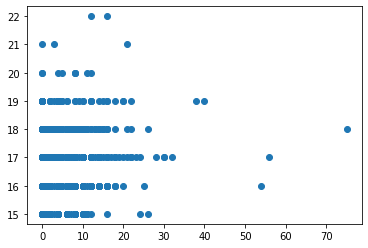

In [29]:
plt.scatter( df['absences'], df['age'])
plt.show()

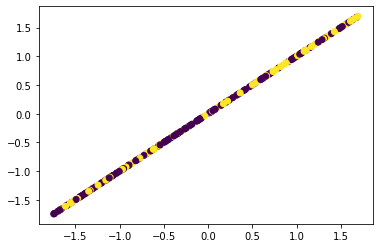

In [44]:
plt.scatter( X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test)
plt.show()
